## Data science snippets
### Sinuglar Value Decomposition
 
Let $\vec{a} = (a_x, a_y)$ and $\vec{b} = (b_x, b_y)$ are two data points on the plane. Let us find the projections of points on the given orthogonal vectors on the plane $\vec{v}_1 = (v_{1x}, v_{1y})$ and $\vec{v}_2 = (v_{2x}, v_{2y})$ (coordinates of $\vec{a}$, $\vec{b}$, $\vec{v}_1$, $\vec{v}_2$ are given in the same cartesian coordinate system).

$
\underbrace{
\begin{pmatrix}
a_x & a_y \\
b_x & b_y 
\end{pmatrix}
}_{A}
\underbrace{
\begin{pmatrix}
v_{1x} & v_{2x} \\
v_{1y} & v_{2y} 
\end{pmatrix}
}_{V}=
\underbrace{
\begin{pmatrix}
s_{a1} & s_{a2} \\
s_{b1} & s_{b2} 
\end{pmatrix}
}_{S}
$
where $s_{a1}$, $s_{a2}$ are projections of the $\vec{a}$ point on the $\vec{v}_1$ and $\vec{v}_2$ respectively, $s_{b1}$, $s_{b2}$ are projections of the $\vec{b}$ point on the $\vec{v}_1$ and $\vec{v}_2$ respectively.
Thus matrix of points $A$ can be expressed via matrix of basis vectors and $V$ and matrix of projections $S$ as follows

$
A = S V^{-1} = S V^\text{T}
$
$V^{-1} = V^\text{T}$ because its rows are linearly independent.

Also, we can rewrite $S$ as follows
$
S=\underbrace{
\begin{pmatrix}
\dfrac{s_{a1}}{\sigma_1} & \dfrac{s_{a2}}{\sigma_2} \\
\dfrac{s_{b1}}{\sigma_1} & \dfrac{s_{b2}}{\sigma_2} 
\end{pmatrix}
}_{U}
\underbrace{
\begin{pmatrix}
\sigma_1 & 0 \\
0 & \sigma_2 
\end{pmatrix}
}_{Z}
$
with $\sigma_1 = \sqrt{s_{a1}^2 + s_{b1}^2}$, $\sigma_2 = \sqrt{s_{a2}^2 + s_{b2}^2}$.

Thus SVD of $A$ reads

$
A = U Z V^\text{T}
$

 > for TeX typesetting plese use [Markdown All in One](https://marketplace.visualstudio.com/items?itemName=yzhang.markdown-all-in-one) extension. 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
def plot_points(points: np.ndarray, c: np.ndarray, vecs: list=[]):
    """Plot 2D points distribution."""
    ax = plt.subplot(1,1,1)
    ax.scatter(points[:,0], points[:,1], marker = 'o', s=10, facecolor='w', edgecolors='k')
    ax.scatter(c[0], c[1], marker = '^', s=100, facecolor='r', edgecolors='k')
    if len(vecs) > 0:
        for vec in vecs:
            ax.plot([c[0], vec[0]], [c[1], vec[1]], c='#03bafc', linewidth=2)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_aspect(1)
    plt.show()

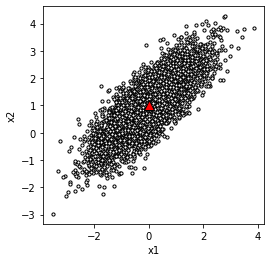

In [4]:
# create test dataset as 2D normal distribution
c = [0, 1]
cov = [[1, 0.8], [0.8, 1]]
N = 5000

x0, y0 = np.random.multivariate_normal(c, cov, N).T
points = np.array(list(zip(x0, y0)))

plot_points(points, c)


Singular values:
[94.40767197 31.27610882]
Basis vectors:
[[ 0.70793141  0.70628119]
 [ 0.70628119 -0.70793141]]


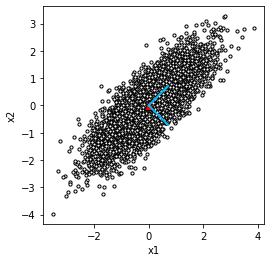

In [5]:
# center data
centered = points - c
# make SVD
U, S, V = np.linalg.svd(centered)
print(f"\nSingular values:\n{S}\nBasis vectors:\n{V}")
plot_points(centered, [0, 0], V)